In [1]:
import pandas as pd
df=pd.read_csv('tvmarketing.csv')

In [2]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
df.shape

(200, 2)

In [4]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


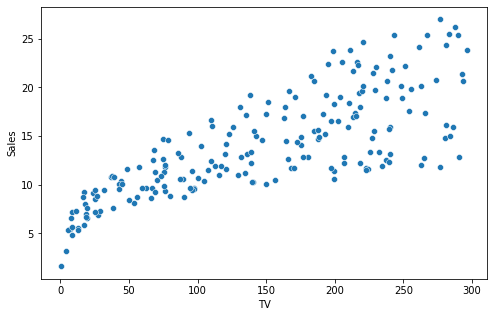

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='TV',y='Sales')

plt.show()

In [6]:
x=df.drop(columns=['Sales'])
y=df['Sales']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
x_train.shape

(140, 1)

In [8]:
y_train.shape

(140,)

In [9]:
x_test.shape

(60, 1)

In [10]:
y_test.shape

(60,)

In [11]:
import numpy as np
x_mean=np.mean(x_train)
y_mean=np.mean(y_train)
numerator=sum((x.iloc[i]-x_mean)*(y.iloc[i]-y_mean) for i in range(len(x_train)))
denominator=sum((x.iloc[i]-x_mean)**2 for i in range(len(x_train)))

In [12]:
b1=numerator/numerator
print('Slope',b1)

Slope TV    1.0
dtype: float64


In [13]:
b0=y_mean-b1*x_mean
print('intercept',b0)


intercept TV   -141.892143
dtype: float64


In [14]:
y_pred=b0+b1*x_test
y_pred

,TV
95,21.407857
15,53.507857
30,151.007857
158,-130.192143
128,78.407857
115,-66.792143
69,74.907857
170,-91.892143
174,80.507857
45,33.207857


In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

-278.0852718807646


In [17]:
print("slope coefficeint",model.coef_[0])

slope coefficeint 0.046407802128152764


In [18]:
print("intercept",model.intercept_)

intercept 7.239459830751138


/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


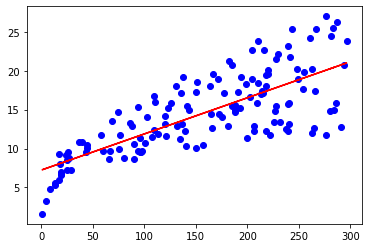

In [19]:
x_train=np.array(x_train).reshape(-1,1)
plt.scatter(x_train,y_train,color='blue')
y_pred=model.predict(x_train)
plt.plot(x_train,y_pred,color="red")
plt.show()

/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


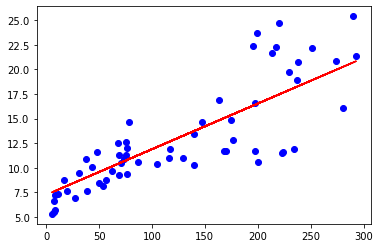

In [20]:
x_test=np.array(x_test).reshape(-1,1)
plt.scatter(x_test,y_test,color='blue')
y_pred=model.predict(x_test)
plt.plot(x_test,y_pred,color='red')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

8.970991242413614


In [36]:
def R_sqaured(y_test,y_pred):
    ymean=y_test.mean()
    ss_tot=sum((y_test.iloc[i]-ymean)**2 for i in range(len(y_test)))
    ss_res=sum((y_test.iloc[i]-y_pred[i])**2 for i in range(len(y_test)))
    r2=1-(ss_res/ss_tot)
    return r2

In [37]:
print(R_sqaured(y_test,model.predict(x_test)))

0.6714477229302764


/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
def adjusted_r_squared(y_test,y_pred,k):
    n=len(y_test)
    r2=R_sqaured(y_test,y_pred)
    adj_r2=1-(1-r2)*(n-1)/(n-k-1)
    return adj_r2

In [39]:
adjusted_r_squared(y_test,model.predict(x_test),1)

/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.6657830284980398